

# > **Handwritten script analysis**


---





# Abstract
 This project focuses on the mathematical foundation for AI/ML using the MNIST dataset.
 We perform eigen decomposition, apply PCA for dimensionality reduction, and assess reconstruction error using PSNR.
 ## 1 Introduction
 The MNIST dataset is a comprehensive collection of handwritten digits ranging from 0 to 9. It includes 60,000 grayscale images for training and 10,000 images for testing. Each image is 28 by 28 pixels, with pixel values ranging from 0 to 255. In this project, we focus on analyzing a subset of the test dataset and apply Principal Component Analysis (PCA) to reduce dimensionality.
 ## 2 Tasks
 ### Task 1: Eigen Decomposition

 Compute the eigen decomposition of the sample covariance matrix. Use the eigenvalues to calculate the percentage of variance explained. Plot the cumulative sum of these percentages versus the number of components.

 ### Task 2: PCA for Dimensionality Reduction
 Apply PCA via eigen decomposition to reduce the dimensionality of the images for each

 p ∈{50,250,500}.

 ### Task 3: Data Reconstruction
 Using the reduced data from Task 2, reconstruct the original images. Use the property of orthonormal matrices for reconstruction.

 ### Task 4: Error Comparison (PSNR)
 Compare the error between the original and reconstructed images for 5 randomly selected images using Peak Signal-to-Noise Ratio (PSNR).

 ## 3 Methodology
 ### 3.1 Dataset
 The MNISTdataset consists of 60,000 training and 10,000 testing images. In this project, we use the first 2000 samples from the test set. The images are scaled to the range [0, 1] by dividing each pixel value by 255.
 ### 3.2 Data Preprocessing
 Each image is flattened into a vector of size 784 (28x28). A matrix X ∈ R2000× 784 is created, where each row represents a flattened image.
 ### 3.3 Eigen Decomposition
 We compute the sample covariance matrix of X and perform eigen decomposition. The eigenvalues represent the variance explained by each principal component.
 ### 3.4 PCA
 We reduce the dimensionality of the dataset using PCA for p ∈ {50,250,500} and reconstruct the data using the principal components.
 ## 4 Results and Discussion
 ### 4.1 Variance Explained
 The cumulative variance explained by the principal components shows that most of the variance can be captured with fewer components.
 ### 4.2 Data Reconstruction
 The reconstructed images from different values of p show varying levels of detail. Higher values of p result in better reconstruction.
 ### 4.3 Error Comparison
 The PSNR values indicate the reconstruction quality. Higher PSNR values suggest less reconstruction error.
 ## 5 Conclusion
 In this project, we applied PCA to the MNIST dataset and successfully reduced the dimensionality while retaining most of the variance. The reconstructed images showed good quality with minimal error, as indicated by the PSNR values.

 # References
 1. MNIST Dataset: http://yann.lecun.com/exdb/mnist/
 2. Python Peak Signal-to-Noise Ratio (PSNR): https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/

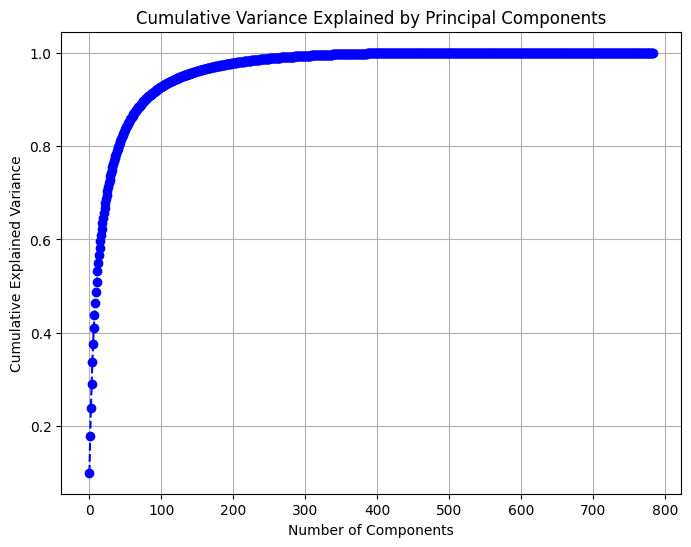

PSNR values for p=50: [19.899389030077614, 18.528465376208914, 19.489227219783608, 22.670685699005034, 19.81666880030015]
PSNR values for p=100: [23.757457643200436, 21.196045925091738, 22.517932796580745, 23.294767751786857, 26.555385215072857]
PSNR values for p=250: [28.791564624938623, 30.89112986330711, 29.587733881110356, 30.103479228160165, 32.75747966485321]
PSNR values for p=500: [55.713263873986776, 52.36957745417875, 54.91254365299341, 55.447992832519056, 51.68581593288455]


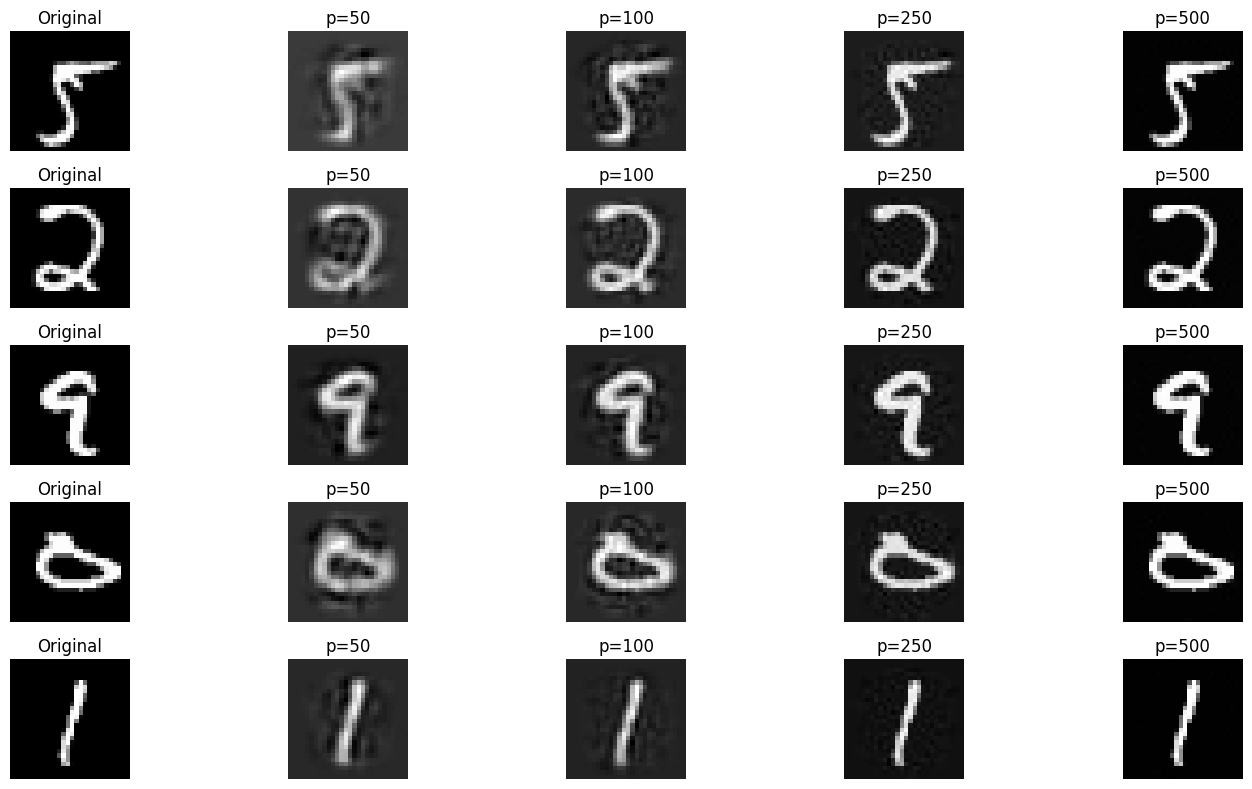

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from skimage.metrics import peak_signal_noise_ratio as psnr

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float64)
X /= 255.0  # Normalize pixel values to [0, 1]

# Split into training and test sets
X_train, X_test = X[:60000], X[60000:]

# Select a subset of the test dataset
subset_size = 1000
X_subset = X_test[:subset_size]

# Step 2: Compute the sample covariance matrix and perform eigen decomposition
mean_vector = np.mean(X_subset, axis=0)
X_centered = X_subset - mean_vector
cov_matrix = np.cov(X_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the percentage of variance explained
variance_explained = eigenvalues / np.sum(eigenvalues)
cumulative_variance_explained = np.cumsum(variance_explained)

# Plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_explained, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid()
plt.show()

# Step 3: Dimensionality Reduction and Reconstruction
components = [50, 100, 250, 500]
reconstructed_images = {}
errors = {}

for p in components:
    # Reduce dimensionality
    pca = PCA(n_components=p)
    X_reduced = pca.fit_transform(X_subset)

    # Reconstruct images
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstructed_images[p] = X_reconstructed

    # Compute PSNR for 5 randomly selected images
    psnr_values = []
    for i in np.random.choice(range(subset_size), 5, replace=False):
        psnr_value = psnr(X_subset[i].reshape(28, 28), X_reconstructed[i].reshape(28, 28))
        psnr_values.append(psnr_value)
    errors[p] = psnr_values

# Display results
for p, psnr_values in errors.items():
    print(f"PSNR values for p={p}: {psnr_values}")

# Visualize original and reconstructed images
num_images = 5
indices = np.random.choice(range(subset_size), num_images, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    plt.subplot(num_images, len(components) + 1, i * (len(components) + 1) + 1)
    plt.imshow(X_subset[idx].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    for j, p in enumerate(components):
        plt.subplot(num_images, len(components) + 1, i * (len(components) + 1) + j + 2)
        plt.imshow(reconstructed_images[p][idx].reshape(28, 28), cmap='gray')
        plt.title(f"p={p}")
        plt.axis('off')

plt.tight_layout()
plt.show()
